In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class IrisClassification:
    def __init__(self):

        # Load the iris dataset
        self.iris_dataset = load_iris()
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.knn = None

    def display_data_description(self):

        # Display first part of dataset description
        print("Data Description:\n{}".format(self.iris_dataset['DESCR'][:193]))
        print(self.iris_dataset['DESCR'][1:10])

    def display_data_shape(self):

        # Display shape of the dataset
        print("Data shape:", self.iris_dataset.data.shape)

    def split_data(self, test_size=0.3, random_state=42):

        # Split the data into training and testing sets
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.iris_dataset['data'], self.iris_dataset['target'],
            test_size=test_size, random_state=random_state
        )
        print(f"Training data shape: {self.X_train.shape}")
        print(f"Testing data shape: {self.X_test.shape}")

    def variable_unpacking_example(self):

        # Variable unpacking example
        x, y, z = (1, 2, 3)
        print("Variable unpacking:", x, y, z)

    def visualize_data(self):

        # Visualize the training data using a scatter matrix
        iris_df = pd.DataFrame(self.X_train, columns=self.iris_dataset.feature_names)
        pd.plotting.scatter_matrix(
            iris_df, c=self.y_train, figsize=(15, 15), marker='o',
            hist_kwds={'bins': 20}, s=60, alpha=0.8
        )
        plt.show()

    def train_model(self, n_neighbors=1):

        # Train a KNN model
        self.knn = KNeighborsClassifier(n_neighbors=n_neighbors)
        self.knn.fit(self.X_train, self.y_train)
        print(f"KNN model with {n_neighbors} neighbors trained.")

    def predict_and_evaluate(self):

        # Predict using the test set and evaluate the accuracy
        if self.knn is None:
            print("Please train the model before making predictions.")
            return

        y_pred = self.knn.predict(self.X_test)
        print("Test set predictions:\n{}".format(y_pred))
        accuracy = np.mean(y_pred == self.y_test)
        print("Test set accuracy: {:.2f}".format(accuracy))


In [4]:
# Create an object of the IrisClassification class
iris_classifier = IrisClassification()

In [5]:
# Display dataset description
iris_classifier.display_data_description()

Data Description:
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
. _iris_d


In [6]:
# Display the shape of the dataset
iris_classifier.display_data_shape()

Data shape: (150, 4)


In [7]:
# Split the data into training and test sets
iris_classifier.split_data()

Training data shape: (105, 4)
Testing data shape: (45, 4)


In [8]:
# Example of variable unpacking
iris_classifier.variable_unpacking_example()

Variable unpacking: 1 2 3


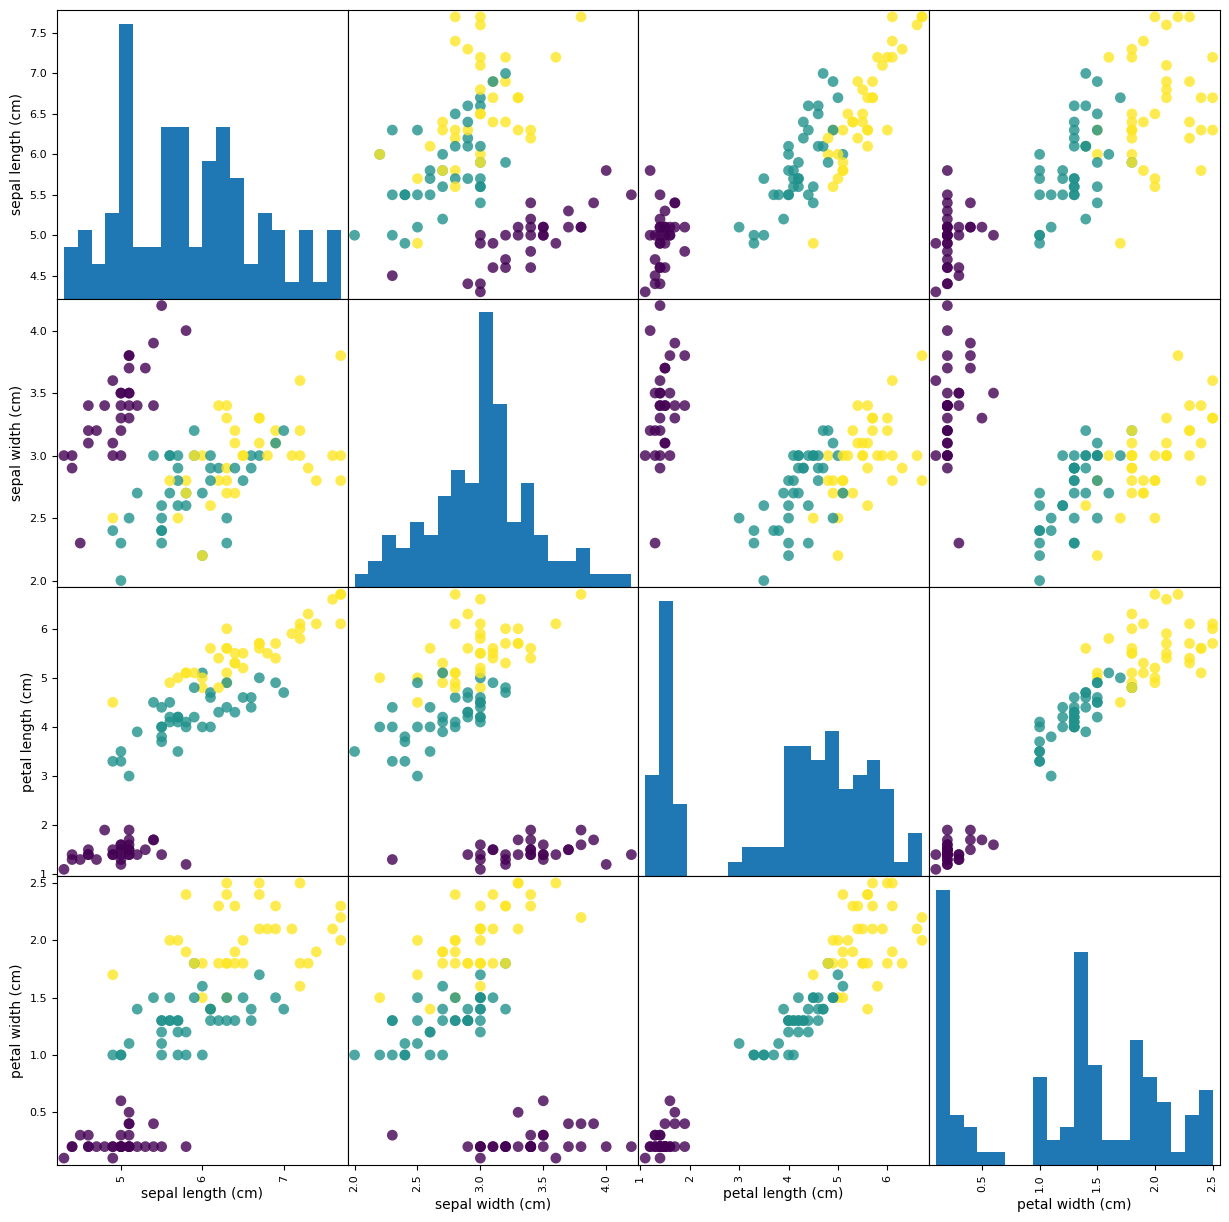

In [9]:
# Visualize the data with scatter plot
iris_classifier.visualize_data()

In [10]:
# Train the KNN model
iris_classifier.train_model(n_neighbors=3)

KNN model with 3 neighbors trained.


In [11]:
# Make predictions and evaluate the model
iris_classifier.predict_and_evaluate()

Test set predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
Test set accuracy: 1.00
